In [1]:
import os
import pandas as pd
from scipy.stats import norm  
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
def read_data_from(root): 
    accuracy = pd.read_csv(root+"accuracy.csv", encoding = 'latin-1')
    overall = pd.read_csv(root+"Overall.csv", encoding = 'latin-1')
    overall = overall[~overall['opalTime'].isna()]
    overall_fair = overall[(overall['mergeEdges'] != -1) & (overall['opalEdges'] != -1)]
    return accuracy, overall_fair

In [3]:
wala_acc,wala_overall = read_data_from('results/outputStats/expresults/wala/')
opal_acc,opal_overall = read_data_from('results/outputStats/expresults/opal/')
# input_data = pd.read_csv(root+"inputStats.csv")

In [5]:
pd.set_option('display.max_colwidth', None)
wala_acc[wala_acc['recall']==0].sort_values(by=['OPAL'])

,number,coordinate,source,precision,recall,OPAL,Merge,intersection
925224,167175,com.google.code.maven-play-plugin.org.playframework:play:1.5.0,"fasten://mvn!org.codehaus.groovy:groovy-all$2.4.11/org.codehaus.groovy.runtime/dgm$90.invoke(%2Fjava.lang%2FObject,%2Fjava.lang%2FObject%25255B%25255D)%2Fjava.lang%2FObject",1.0,0.0,1,0,0
626849,194739,org.apache.solr:solr-map-reduce:5.4.1,fasten://mvn!org.bouncycastle:bcprov-jdk15$1.45/org.bouncycastle.crypto.params/DHValidationParameters.equals(%2Fjava.lang%2FObject)%2Fjava.lang%2FBooleanType,0.0,0.0,1,1,0
322152,103478,com.google.code.maven-play-plugin.org.playframework:play:1.4.3,fasten://mvn!io.netty:netty$3.10.5.Final/org.jboss.netty.handler.codec.spdy/DefaultSpdyHeaders$HeaderEntry.setValue(%2Fjava.lang%2FString)%2Fjava.lang%2FString,1.0,0.0,1,0,0
322145,103471,com.google.code.maven-play-plugin.org.playframework:play:1.4.3,"fasten://mvn!org.codehaus.groovy:groovy-all$2.4.7/org.codehaus.groovy.runtime/dgm$45.%3Cinit%3E(%2Fjava.lang%2FString,%2Forg.codehaus.groovy.reflection%2FCachedClass,%2Fjava.lang%2FClass,%2Fjava.lang%2FClass%25255B%25255D)%2Fjava.lang%2FVoidType",1.0,0.0,1,0,0
626855,194745,org.apache.solr:solr-map-reduce:5.4.1,fasten://mvn!org.apache.hadoop:hadoop-hdfs$2.6.0/org.apache.hadoop.hdfs.server.namenode/FsImageProto$INodeSection$INodeFile.newBuilderForType(%2Fcom.google.protobuf%2FGeneratedMessage$BuilderParent)FsImageProto$INodeSection$INodeFile$Builder,1.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...
626212,194102,org.apache.solr:solr-map-reduce:5.4.1,fasten://mvn!org.kitesdk:kite-morphlines-tika-core$1.1.0/org.kitesdk.morphline.tika/DetectMimeTypeBuilder$DetectMimeType.doProcess(%2Forg.kitesdk.morphline.api%2FRecord)%2Fjava.lang%2FBooleanType,1.0,0.0,4283,0,0
556136,124026,org.apache.solr:solr-map-reduce:5.4.1,"fasten://mvn!org.kitesdk:kite-morphlines-avro$1.1.0/org.kitesdk.morphline.avro/AvroConversions.toAvro(%2Fjava.lang%2FObject,%2Forg.apache.avro%2FSchema)%2Fjava.lang%2FObject",1.0,0.0,4319,0,0
675563,243453,org.apache.solr:solr-map-reduce:5.4.1,fasten://mvn!org.apache.solr:solr-core$5.4.1/org.apache.solr.search.grouping.distributed.requestfactory/StoredFieldsShardRequestFactory.constructRequest(%2Forg.apache.solr.handler.component%2FResponseBuilder)%2Forg.apache.solr.handler.component%2FShardRequest%25255B%25255D,1.0,0.0,4349,0,0
508901,76791,org.apache.solr:solr-map-reduce:5.4.1,fasten://mvn!org.apache.hadoop:hadoop-common$2.6.0/org.apache.hadoop.net.unix/DomainSocketWatcher$1.run()%2Fjava.lang%2FVoidType,1.0,0.0,4357,0,0


In [126]:
def mean_median_std(data, field):
    print("mean of %s: %f" %( field, data[field].mean()))
    print("std of %s: %f" %( field, data[field].std()))
    print("median of %s: %f" %( field, data[field].median()))
    print('\n')
    
def violin(data, field, path):
    fig, (ax1) = plt.subplots(nrows=1, ncols=1)
    ax1.violinplot(data[field], showmedians=True)
    ax1.set_title(field)
    plt.savefig(path)
    plt.show()
    plt.close()
    
def cumulative_curve(data, field):
    plt.title(field)
    X2 = np.sort(data[field])/float(1000)
    F2 = np.array(range(len(data[field])))
    plt.plot(X2, F2)
    plt.ticklabel_format(useOffset=False)
    plt.show()
    plt.close()
    
def remove_outliers(df):
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    new_df = df[filtered_entries]
    return new_df

In [127]:
def print_stats(accuracy, overall): 
    print("####### Accuracy Comparison ####### \n ")
    mean_median_std(accuracy, 'precision')
    mean_median_std(accuracy, 'recall')
    print("####### Num Edges ####### \n ")
    mean_median_std(accuracy, 'OPAL')
    mean_median_std(accuracy, 'Merge')
    mean_median_std(accuracy, 'intersection')

    df = pd.DataFrame(dict(mean=[accuracy['precision'].mean(), accuracy['recall'].mean()],
                      std=[accuracy['precision'].std(), accuracy['recall'].std()],
                      median=[accuracy['precision'].median(), accuracy['recall'].median()]))

#     print(df.to_latex(index = True, index_names= True))

    print("####### Edge Comparison ####### \n ")
    mean_median_std(overall, 'mergeEdges')
    mean_median_std(overall, 'opalEdges')

    print("merge edges: %d" %(overall['mergeEdges'].sum()))
    print("generator edges: %d" %(overall['mergeEdges'].sum()))

    print("####### Time Comparison ####### \n ")
    df = pd.DataFrame(dict(mean=[overall['mergeTime'].mean(), overall['opalTime'].mean(), overall['cgPool'].mean()],
                      std=[overall['mergeTime'].std(), overall['opalTime'].std(), overall['cgPool'].std()],
                      median=[overall['mergeTime'].median(), overall['opalTime'].median(), overall['cgPool'].median()]))

#     print(df.to_latex(index = True, index_names= True))

    mean_median_std(overall, 'mergeTime')
    mean_median_std(overall, 'UCHTime')
    mean_median_std(overall, 'opalTime')

In [128]:
print("## OPAL")
print_stats(opal_acc, opal_overall)
print("## WALA")
print_stats(wala_acc, wala_overall)

## OPAL
####### Accuracy Comparison ####### 
 
mean of precision: 0.979855
std of precision: 0.105929
median of precision: 1.000000


mean of recall: 0.831407
std of recall: 0.312725
median of recall: 1.000000


####### Num Edges ####### 
 
mean of OPAL: 36.052629
std of OPAL: 167.819954
median of OPAL: 2.000000


mean of Merge: 27.573350
std of Merge: 142.293979
median of Merge: 2.000000


mean of intersection: 26.751042
std of intersection: 139.691190
median of intersection: 2.000000


####### Edge Comparison ####### 
 
mean of mergeEdges: 2782272.300000
std of mergeEdges: 2212122.505881
median of mergeEdges: 2049332.000000


mean of opalEdges: 3793777.800000
std of opalEdges: 2904781.169419
median of opalEdges: 2757223.500000


merge edges: 27822723
generator edges: 27822723
####### Time Comparison ####### 
 
mean of mergeTime: 13139.100000
std of mergeTime: 12546.045826
median of mergeTime: 9942.500000


mean of UCHTime: 1562.300000
std of UCHTime: 1499.363795
median of UCHTime: 11

In [129]:
def generate_figures(accuracy, overall):
    directory = "figure"
    if not os.path.exists(directory):
        os.mkdir(directory)

    print("####### Accuracy Comparison ####### \n ")
    fig, (ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)
    ax1[0].violinplot(accuracy['precision'], showmedians=True)
    ax1[1].violinplot(accuracy['recall'], showmedians=True)
    ax1[0].set_title('precision')
    ax1[1].set_title('recall')
    plt.savefig(directory+'/precisonRecall.pdf')
    plt.show()
    plt.close()

    print("####### Edge Comparison ####### \n ")
    fig, (ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)
    ax1[0].violinplot(overall['mergeEdges'], showmedians=True)
    ax1[1].violinplot(overall['opalEdges'], showmedians=True)
    ax1[0].set_title('Stitching edges')
    ax1[1].set_title('Opal edges')
    plt.savefig(directory+'/edgeComparison.pdf')
    plt.show()
    plt.close()

    print("####### Time Comparison ####### \n ")
    fig, (ax1) = plt.subplots(nrows=1, ncols=3, sharey=True)
    ax1[0].violinplot(overall['opalTime'], showmedians=True)
    ax1[1].violinplot(overall['cgPool'], showmedians=True)
    ax1[2].violinplot(overall['mergeTime'], showmedians=True)
    ax1[0].set_title('opalTime')
    ax1[1].set_title('cgCacheTime')
    ax1[2].set_title('StitchingTime')
    plt.savefig(directory+'/timeViolin.pdf')
    plt.show()
    plt.close()



## OPAL
####### Accuracy Comparison ####### 
 


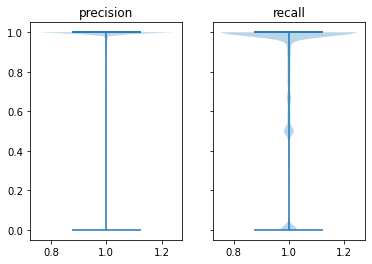

####### Edge Comparison ####### 
 


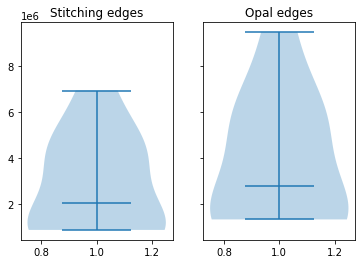

####### Time Comparison ####### 
 


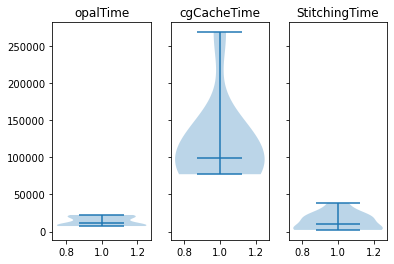

## WALA
####### Accuracy Comparison ####### 
 


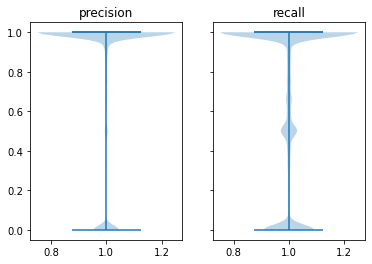

####### Edge Comparison ####### 
 


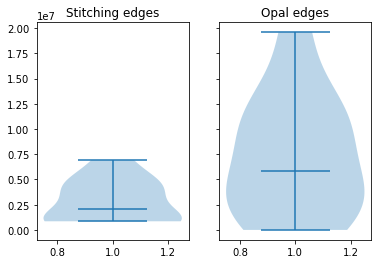

####### Time Comparison ####### 
 


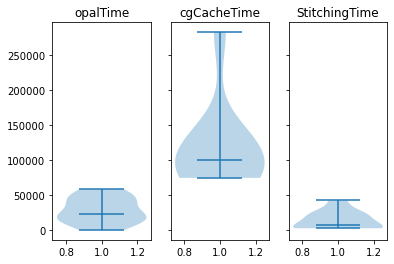

In [130]:
print("## OPAL")
generate_figures(opal_acc, opal_overall)
print("## WALA")
generate_figures(wala_acc, wala_overall)

####### Input Data ####### 
 


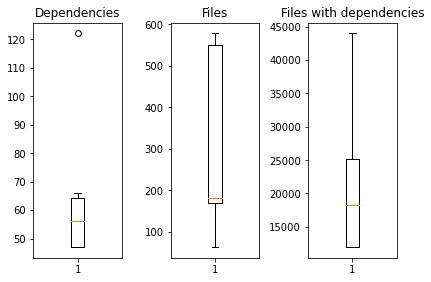

In [36]:
print("####### Input Data ####### \n ")
fig, (ax1) = plt.subplots(nrows=1, ncols=3, sharey=False)
ax1[0].boxplot(remove_outliers(input_data['depNum']))
ax1[0].set_title('Dependencies')
ax1[1].boxplot(remove_outliers(input_data['numFiles']))
ax1[1].set_title('Files')
ax1[2].boxplot(remove_outliers(input_data['numFilesWithDeps']))
ax1[2].set_title('Files with dependencies')
fig.tight_layout(pad=1)

# plt.savefig(directory+'/input.pdf')
plt.show()
plt.close()

In [32]:
input_data['numFilesWithDeps']

0    24475
1    11956
2    11956
3    11956
4    25331
5    11957
6    43986
7    13003
8    28136
9    23496
Name: numFilesWithDeps, dtype: int64

In [41]:
new = input_data['numFilesWithDeps'][0:2]
cond = input_data['numFilesWithDeps'].isin(new)
df1 = input_data['numFilesWithDeps']
df2 = df1.drop(df1[cond].index)
print(df2)


4    25331
5    11957
6    43986
7    13003
8    28136
9    23496
Name: numFilesWithDeps, dtype: int64


In [39]:
new

0    24475
1    11956
Name: numFilesWithDeps, dtype: int64

In [18]:
print("depNum: %s"%input_data['depNum'].mean())
print("numFiles: %s"%input_data['numFiles'].mean())
print("numFilesWithDeps: %s"%input_data['numFilesWithDeps'].mean())

depNum: 61.5
numFiles: 316.3
numFilesWithDeps: 20625.2


In [40]:
df1

0    24475
1    11956
2    11956
3    11956
4    25331
5    11957
6    43986
7    13003
8    28136
9    23496
Name: numFilesWithDeps, dtype: int64

####### Accuracy Comparison ####### 
 


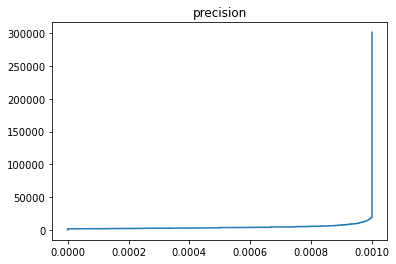

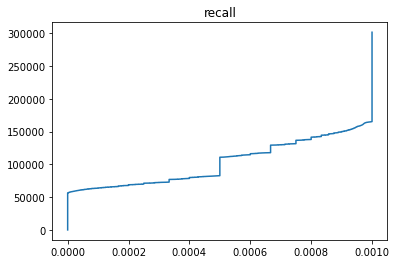

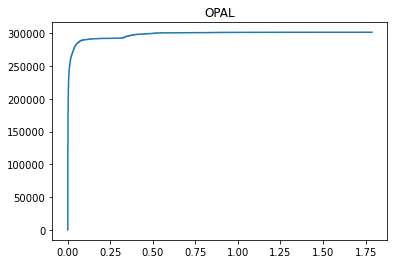

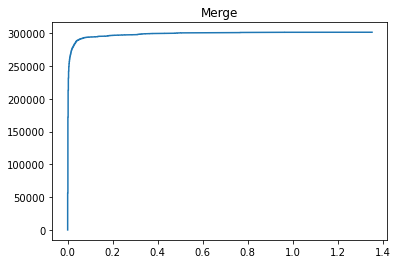

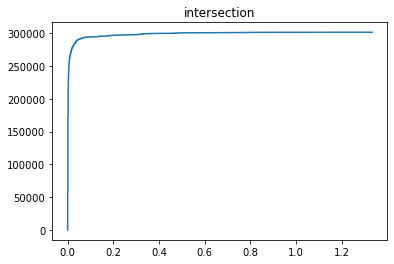

In [19]:
print("####### Accuracy Comparison ####### \n ")
cumulative_curve(accuracy, 'precision')
cumulative_curve(accuracy, 'recall')
cumulative_curve(accuracy, 'OPAL')
cumulative_curve(accuracy, 'Merge')
cumulative_curve(accuracy, 'intersection')

In [3]:
logs = pd.read_csv("/Users/mehdi/Desktop/MyMac/TUD/FASTEN/Repositories/MainRepo/LightWeightCGs/results/outputStats/rnd1000-14g/Logs.csv")

In [4]:
len(logs[logs['opalLog'].str.contains("Writing graph to")])

258

In [15]:
len(logs[(~logs['opalLog'].str.contains("OPALException")) & (~logs['opalLog'].str.contains("Writing graph to"))])

90

In [17]:
logs[(~logs['opalLog'].str.contains("OPALException")) & (~logs['opalLog'].str.contains("Writing graph to"))]['number']

0        0
11      11
24      24
40      40
41      41
      ... 
655    655
662    662
667    667
671    671
688    688
Name: number, Length: 90, dtype: int64

In [86]:
x = pd.read_csv("/Users/mehdi/Desktop/MyMac/TUD/FASTEN/Repositories/MainRepo/LightWeightCGs/results/outputStats/rnd2000-7g-RTA/Overall.csv")
xx = x[x['mergeTime'] != 0]

In [87]:
merge = xx['mergeTime']+xx['UCHTime']
merge

0       16921.0
1       28829.0
2        1151.0
3         457.0
4        7443.0
         ...   
1256      178.0
1257      109.0
1258     3256.0
1259      947.0
1260      474.0
Length: 1146, dtype: float64

In [109]:
xx

,number,coordinate,opalTime,totalMergeTime,cgPool,mergeTime,UCHTime,opalNodes,opalEdges,mergeNodes,mergeEdges,dependencies
0,0,io.liftwizard:liftwizard-config-data-source:0....,0.0,106104,90929,15175,1746.0,0,0,184893,3625954,io.liftwizard:liftwizard-config-data-source:0....
1,1,io.laminext:websocket-circe_sjs1_3.0.0-RC1:0.12.1,0.0,109754,83697,26057,2772.0,0,0,197960,6556775,io.laminext:websocket-circe_sjs1_3.0.0-RC1:0.1...
2,2,de.bmiag.tapir:tapir-annotations:3.6.2,0.0,19678,18820,858,293.0,0,0,26375,247102,org.apache.logging.log4j:log4j-jcl:2.7;de.bmia...
3,3,org.bremersee:bremersee-fac:1.0.1,0.0,16234,15897,337,120.0,0,0,12357,52360,org.bremersee:bremersee-fac:1.0.1;org.bremerse...
4,4,cn.org.faster:spring-boot-starter-dict:1.4.1.R...,0.0,60431,53970,6461,982.0,0,0,89265,1334264,javax.xml.bind:jaxb-api:2.3.0;cn.org.faster:sp...
...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1256,global.namespace.fun-io:fun-io-commons-compres...,1251.0,6050,5954,96,82.0,2948,8848,2932,8547,global.namespace.fun-io:fun-io-spi:2.4.1;globa...
1257,1257,org.ogc-schemas:wcs-interpolation-v_1_0:3.0.0,811.0,5092,5026,66,43.0,719,1146,725,1100,org.jvnet.jaxb2_commons:jaxb2-basics-runtime:0...
1258,1258,org.apache.camel.quarkus:camel-quarkus-aws-tra...,0.0,43237,40952,2285,971.0,0,0,63362,448804,io.smallrye.common:smallrye-common-classloader...
1259,1259,com.google.http-client:google-http-client-jack...,4940.0,14991,14277,714,233.0,22421,203715,22269,176724,io.grpc:grpc-context:1.27.2;org.apache.httpcom...


In [124]:
yy = xx[xx["mergeNodes"] !=0]
yy = yy[yy["mergeEdges"] != 0]

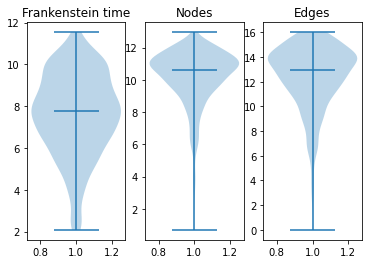

In [149]:
fig, (ax1) = plt.subplots(nrows=1, ncols=3, sharey=False)
ax1[0].violinplot(np.log(merge), showmedians=True)
ax1[1].violinplot(np.log(yy["mergeNodes"]), showmedians=True)
ax1[2].violinplot(np.log(yy["mergeEdges"]), showmedians=True)
ax1[0].set_title('Frankenstein time')
ax1[1].set_title('Nodes')
ax1[2].set_title('Edges')
plt.savefig('/Users/mehdi/Desktop/MyMac/TUD/FASTEN/Repositories/MainRepo/LightWeightCGs/results/outputStats/rnd2000-7g-RTA/figures/mergeAllCGs.pdf')
plt.show()
plt.close()


In [136]:
merge.median()

2309.5

In [128]:
yy["mergeNodes"].describe()


count      1108.000000
mean      59621.091155
std       61927.548463
min           2.000000
25%       13735.000000
50%       41379.000000
75%       84342.000000
max      421554.000000
Name: mergeNodes, dtype: float64

In [131]:
yy["mergeNodes"].median()

41379.0

In [133]:
yy["mergeEdges"].describe().apply(lambda x: format(x, 'f'))

count       1108.000000
mean     1230902.480144
std      1828811.906099
min            1.000000
25%        69812.750000
50%       421463.500000
75%      1481523.000000
max      8887288.000000
Name: mergeEdges, dtype: object

In [132]:
yy["mergeEdges"].median()

421463.5

####### Input Data ####### 
 


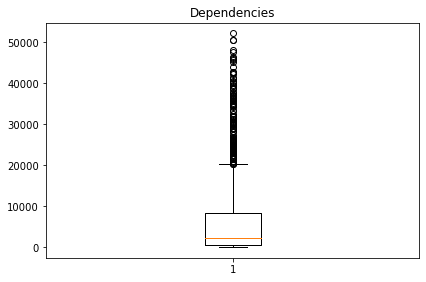

In [107]:
print("####### Input Data ####### \n ")
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharey=False)
ax1.boxplot(remove_outliers(merge))
ax1.set_title('Dependencies')
fig.tight_layout(pad=1)

# plt.savefig(directory+'/input.pdf')
plt.show()
plt.close()

In [88]:
sample_sizes=[10, 20, 30, 50, 100, 170, 300, 400, 500, 600]
result = {}
for size in sample_sizes:
    iteration = 200
    result[size] = []
    for i in range(iteration):
        sample = merge.sample(n=size)
        mean = int(sample.mean())
        result[size].append(mean)

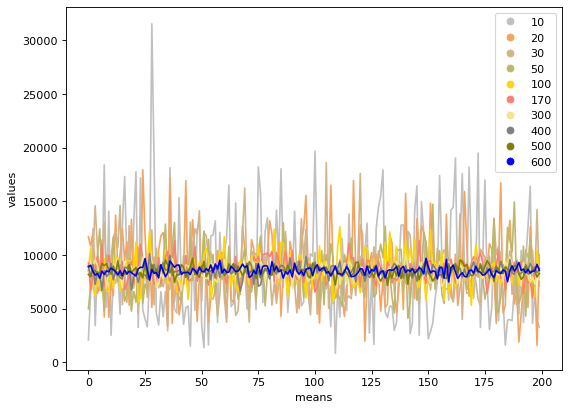

In [89]:
color_map = {10: 'silver', 20: 'sandybrown', 30: 'tan', 
              50: 'darkkhaki', 100: 'gold', 170: 'salmon', 
             300: 'khaki', 400: 'grey', 500: 'olive', 600: 'b'}

plt.figure(figsize=(8, 6), dpi=80)
# axis labeling
plt.xlabel('means')
plt.ylabel('values')

# figure name
plt.title('')

for size in sample_sizes:

    plt.plot(result[size], color_map[size])


markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
plt.legend(markers, color_map.keys(), numpoints=1)



In [90]:
stds = []
for key in sample_sizes:
    stds.append(np.std(result[key]))

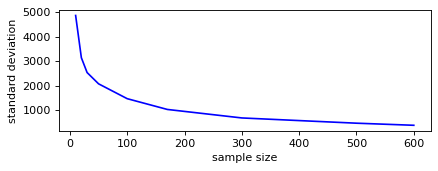

In [96]:
plt.figure(figsize=(6, 2), dpi=80)
# axis labeling
plt.xlabel('sample size')
plt.ylabel('standard deviation')

plt.plot(sample_sizes,stds, 'blue')
plt.savefig('/Users/mehdi/Desktop/MyMac/TUD/FASTEN/Repositories/MainRepo/LightWeightCGs/results/outputStats/rnd2000-7g-RTA/figures/sampleSizes.pdf', format='pdf', dp=900, bbox_inches='tight')

In [77]:
opal = xx[(xx['opalTime'] != 0) & (~xx['opalTime'].isna())]
opal.shape

(544, 12)

In [78]:
merged = opal['mergeTime']+opal['UCHTime']
merged.shape

(544,)

In [79]:
merged

6        9525.0
7          24.0
8          15.0
9        3704.0
10      20097.0
         ...   
1253      500.0
1255      186.0
1256      178.0
1257      109.0
1259      947.0
Length: 544, dtype: float64

In [80]:
diff = opal['opalTime']-merged
diff

6       46817.0
7         375.0
8         305.0
9        7148.0
10      -3487.0
         ...   
1253     2494.0
1255     1174.0
1256     1073.0
1257      702.0
1259     3993.0
Length: 544, dtype: float64

In [81]:
sample_sizes= list(range(2, 544))
means = {}
stds = []
for size in sample_sizes:
    means_temp = []
    stds_temp = []
    for i in range(10):
        mean_temp = int(diff.sample(n=size).mean())
        stds_temp.append(int(diff.sample(n=size).std()))
        means_temp.append(mean_temp)
    means[size] = int(mean_temp.mean())
    stds.append(int(stds_temp.mean()))


AttributeError: 'int' object has no attribute 'mean'

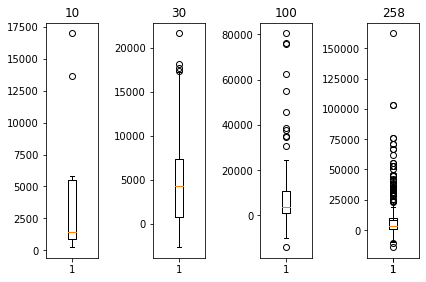

In [21]:
fig, (ax1) = plt.subplots(nrows=1, ncols=4, sharey=False)
ax1[0].boxplot(diff.sample(n=10))
ax1[0].set_title('10')
ax1[1].boxplot(diff.sample(n=30))
ax1[1].set_title('30')
ax1[2].boxplot(diff.sample(n=100))
ax1[2].set_title('100')
ax1[3].boxplot(diff.sample(n=258))
ax1[3].set_title('258')
ax1[3].boxplot(diff.sample(n=258))
ax1[3].set_title('258')
fig.tight_layout(pad=1)

# plt.savefig(directory+'/input.pdf')
plt.show()
plt.close()

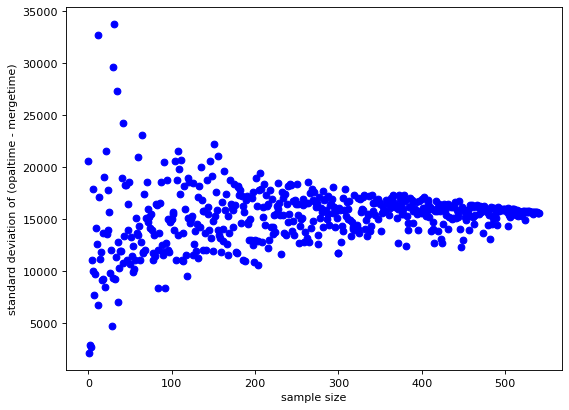

In [19]:
plt.figure(figsize=(8, 6), dpi=80)
# axis labeling
plt.xlabel('sample size')
plt.ylabel('standard deviation of (opaltime - mergetime)')

# figure name
plt.title('')

plt.plot(stds, 'bo')

(array([238.,  12.,   5.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([8.000000e+00, 2.113290e+04, 4.225780e+04, 6.338270e+04,
        8.450760e+04, 1.056325e+05, 1.267574e+05, 1.478823e+05,
        1.690072e+05, 1.901321e+05, 2.112570e+05]),
 <a list of 10 Patch objects>)

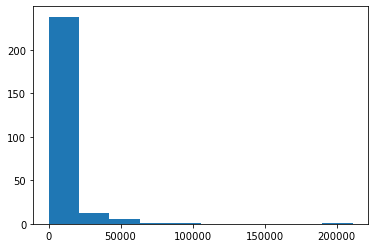

In [48]:
plt.hist(merged)

(array([  1.,   0.,   0.,  10., 225.,  16.,   4.,   0.,   1.,   1.]),
 array([-93641. , -70902.6, -48164.2, -25425.8,  -2687.4,  20051. ,
         42789.4,  65527.8,  88266.2, 111004.6, 133743. ]),
 <a list of 10 Patch objects>)

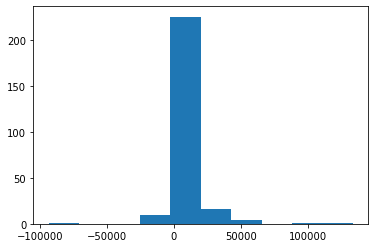

In [57]:
plt.hist(diff)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff19a257a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff19a266100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff19a2576a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff19a2667c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff19a266ac0>],
 'means': []}

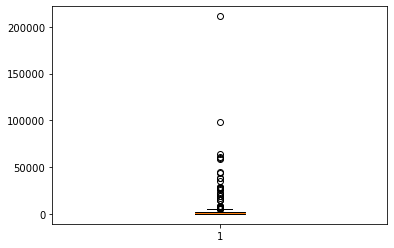

In [49]:
plt.boxplot(merged)

In [50]:
merged.describe()

count       258.000000
mean       5435.961240
std       17531.938468
min           8.000000
25%         215.000000
50%         742.000000
75%        2191.250000
max      211257.000000
dtype: float64

In [51]:
opal["opalTime"].describe()

count       258.000000
mean      11720.317829
std       22328.573913
min         233.000000
25%        1648.750000
50%        4405.000000
75%       10581.000000
max      172094.000000
Name: opalTime, dtype: float64

In [52]:
opal["mergedAll"] = merged

<ipython-input-52-a19e9aac07dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opal["mergedAll"] = merged


In [53]:
opal = opal.drop(columns=["totalMergeTime","cgPool","mergeTime","UCHTime","opalNodes","opalEdges","mergeNodes","mergeEdges","dependencies","number","coordinate"])

In [54]:
opal.describe()

,opalTime,mergedAll
count,258.000000,258.000000
mean,11720.317829,5435.961240
std,22328.573913,17531.938468
min,233.000000,8.000000
25%,1648.750000,215.000000
50%,4405.000000,742.000000
75%,10581.000000,2191.250000
max,172094.000000,211257.000000
